In [92]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from datetime import time
import math
 
import xgboost as xgb
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.base import BaseEstimator
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [93]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.json to data (2).json
User uploaded file "data.json" with length 2134755 bytes


In [94]:
data = next(iter(uploaded.values()))

In [95]:

d = json.loads(data.decode())

In [96]:
len(d)

251

In [97]:
d[0]

{'_index': 'packets-2020-11-19',
 '_score': None,
 '_source': {'layers': {'eth': {'eth.dst': 'd8:32:e3:7a:8e:6b',
    'eth.dst_tree': {'eth.addr': 'd8:32:e3:7a:8e:6b',
     'eth.addr_resolved': 'XiaomiCo_7a:8e:6b',
     'eth.dst_resolved': 'XiaomiCo_7a:8e:6b',
     'eth.ig': '0',
     'eth.lg': '0'},
    'eth.src': '30:f7:72:0e:20:7f',
    'eth.src_tree': {'eth.addr': '30:f7:72:0e:20:7f',
     'eth.addr_resolved': 'HonHaiPr_0e:20:7f',
     'eth.ig': '0',
     'eth.lg': '0',
     'eth.src_resolved': 'HonHaiPr_0e:20:7f'},
    'eth.type': '0x00000800'},
   'frame': {'frame.cap_len': '74',
    'frame.coloring_rule.name': 'HTTP',
    'frame.coloring_rule.string': 'http || tcp.port == 80 || http2',
    'frame.encap_type': '1',
    'frame.ignored': '0',
    'frame.interface_id': '0',
    'frame.interface_id_tree': {'frame.interface_name': 'wlp19s0'},
    'frame.len': '74',
    'frame.marked': '0',
    'frame.number': '7',
    'frame.offset_shift': '0.000000000',
    'frame.protocols': 'eth:et

In [98]:
columns_for_ip = ['ip.version', 'ip.hdr_len', 'ip.len', 'ip.id','ip.dsfield', 'ip.flags', 'ip.ttl', 'ip.proto', 'ip.checksum', 'ip.checksum.status', 'ip.src', 'ip.dst']

columns_for_frame = ['frame.interface_id','frame.time', 'frame.encap_type', 'frame.offset_shift', 'frame.time_epoch', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_relative', 'frame.number', 'frame.len', 'frame.cap_len', 'frame.marked', 'frame.ignored']

columns_for_tcp = ['tcp.srcport', 'tcp.dstport', 'tcp.port', 'tcp.stream', 'tcp.len', 'tcp.seq', 'tcp.nxtseq', 'tcp.ack', 'tcp.hdr_len', 'tcp.flags', 'tcp.window_size_value', 'tcp.window_size', 'tcp.checksum', 'tcp.checksum.status']



In [99]:
d[len(d)-1]["_source"]["layers"]["frame"]


{'frame.cap_len': '66',
 'frame.coloring_rule.name': 'TCP',
 'frame.coloring_rule.string': 'tcp',
 'frame.encap_type': '1',
 'frame.ignored': '0',
 'frame.interface_id': '0',
 'frame.interface_id_tree': {'frame.interface_name': 'wlp19s0'},
 'frame.len': '66',
 'frame.marked': '0',
 'frame.number': '259',
 'frame.offset_shift': '0.000000000',
 'frame.protocols': 'eth:ethertype:ip:tcp',
 'frame.time': 'Nov 19, 2020 14:14:36.838516459 IST',
 'frame.time_delta': '0.367890558',
 'frame.time_delta_displayed': '0.367890558',
 'frame.time_epoch': '1605775476.838516459',
 'frame.time_relative': '2.137991376'}

In [100]:
d[len(d)-1]["_source"]["layers"]["ip"]

{'ip.addr': '192.168.43.231',
 'ip.checksum': '0x00004059',
 'ip.checksum.status': '2',
 'ip.dsfield': '0x00000028',
 'ip.dsfield_tree': {'ip.dsfield.dscp': '10', 'ip.dsfield.ecn': '0'},
 'ip.dst': '192.168.43.231',
 'ip.dst_host': '192.168.43.231',
 'ip.flags': '0x00000000',
 'ip.flags_tree': {'ip.flags.df': '0',
  'ip.flags.mf': '0',
  'ip.flags.rb': '0',
  'ip.frag_offset': '0'},
 'ip.hdr_len': '20',
 'ip.host': '192.168.43.231',
 'ip.id': '0x00004f3d',
 'ip.len': '52',
 'ip.proto': '6',
 'ip.src': '13.33.183.85',
 'ip.src_host': '13.33.183.85',
 'ip.ttl': '122',
 'ip.version': '4'}

In [101]:
d[len(d)-1]["_source"]["layers"]["tcp"]

{'Timestamps': {'tcp.time_delta': '0.367890558',
  'tcp.time_relative': '1.242356207'},
 'tcp.ack': '218',
 'tcp.analysis': {'tcp.analysis.flags': {'_ws.expert': {'_ws.expert.group': '33554432',
    '_ws.expert.message': 'TCP window update',
    '_ws.expert.severity': '2097152',
    'tcp.analysis.window_update': ''}}},
 'tcp.checksum': '0x0000d69b',
 'tcp.checksum.status': '2',
 'tcp.dstport': '38282',
 'tcp.flags': '0x00000010',
 'tcp.flags_tree': {'tcp.flags.ack': '1',
  'tcp.flags.cwr': '0',
  'tcp.flags.ecn': '0',
  'tcp.flags.fin': '0',
  'tcp.flags.ns': '0',
  'tcp.flags.push': '0',
  'tcp.flags.res': '0',
  'tcp.flags.reset': '0',
  'tcp.flags.str': 'Â·Â·Â·Â·Â·Â·Â·AÂ·Â·Â·Â·',
  'tcp.flags.syn': '0',
  'tcp.flags.urg': '0'},
 'tcp.hdr_len': '32',
 'tcp.len': '0',
 'tcp.nxtseq': '465',
 'tcp.options': '01:01:08:0a:1b:41:e4:a7:09:56:b2:36',
 'tcp.options_tree': {'tcp.options.nop': '01',
  'tcp.options.nop_tree': {'tcp.option_kind': '1'},
  'tcp.options.timestamp': '08:0a:1b:41:e4:a

In [102]:
def get_tcp_dict(d,i):
    tcp = {}
    for key,value in d[i]['_source']['layers']['tcp'].items():
      if key in columns_for_tcp:
        if key in ['tcp.checksum','tcp.flags']:
          tcp[key] = int(d[i]['_source']['layers']['tcp'][key],0)
          continue 
 
        if key not in ['tcp.checksum','tcp.flags','tcp.options']:
          tcp[key] = float(d[i]['_source']['layers']['tcp'][key])
        else:
          tcp[key] = d[i]['_source']['layers']['tcp'][key]
 
    return tcp

In [103]:
def get_frame_dict(d,i):
    frame = {}
    for key,value in d[i]['_source']['layers']['frame'].items():
      if key in columns_for_frame:
        if key !="frame.time":
          frame[key] = float(d[i]['_source']['layers']['frame'][key])
        else:
          date_time = d[i]['_source']['layers']['frame'][key].split(" ")
          frame[key] = d[i]['_source']['layers']['frame'][key]
          frame["month"] = date_time[0]
          frame["year"] = int(date_time[2])
          v = pd.to_datetime(d[i]['_source']['layers']['frame'][key]).time()
          tme = time(v.hour,v.minute,v.second,int(str(v.microsecond)[:2]+"0000"))
          frame["hour"] = v.hour
          frame["minute"] = v.minute
          frame["second"] = v.second
          frame["microsecond"] = int(str(v.microsecond)[:2]+"0000")

    return frame


In [104]:
def get_list_of_dict(d):
  all_features_dict= []

  for i in range(len(d)):
    tcp = get_tcp_dict(d,i)
      
    frame = get_frame_dict(d,i)

    ip = {}
    try:
      for key,value in d[i]['_source']['layers']['ip'].items():
        if key in columns_for_ip:
          if key in ['ip.checksum','ip.dsfield','ip.id','ip.flags']:
            ip[key] = int(d[i]['_source']['layers']['ip'][key],0)
          elif key not in ['ip.dst','ip.src']:
            ip[key] = int(d[i]['_source']['layers']['ip'][key])
          else:
            ip[key] = d[i]['_source']['layers']['ip'][key]
    
  #only ip attributes present
      ip.update(frame)
      ip.update(tcp)
      
      #ip has all ip frame and tcp attributes
      all_features_dict.append(ip)

    except:
      print("Not possible with index ",i)

  return all_features_dict




In [105]:
tmp = get_list_of_dict(d)
tmp[0]

Not possible with index  90
Not possible with index  96


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


{'frame.cap_len': 74.0,
 'frame.encap_type': 1.0,
 'frame.ignored': 0.0,
 'frame.interface_id': 0.0,
 'frame.len': 74.0,
 'frame.marked': 0.0,
 'frame.number': 7.0,
 'frame.offset_shift': 0.0,
 'frame.time': 'Nov 19, 2020 14:14:34.909431671 IST',
 'frame.time_delta': 0.000634364,
 'frame.time_delta_displayed': 0.0,
 'frame.time_epoch': 1605775474.9094317,
 'frame.time_relative': 0.208906588,
 'hour': 14,
 'ip.checksum': 16574,
 'ip.checksum.status': 2,
 'ip.dsfield': 0,
 'ip.dst': '52.209.245.238',
 'ip.flags': 16384,
 'ip.hdr_len': 20,
 'ip.id': 58030,
 'ip.len': 60,
 'ip.proto': 6,
 'ip.src': '192.168.43.231',
 'ip.ttl': 64,
 'ip.version': 4,
 'microsecond': 900000,
 'minute': 14,
 'month': 'Nov',
 'second': 34,
 'tcp.ack': 0.0,
 'tcp.checksum': 64007,
 'tcp.checksum.status': 2.0,
 'tcp.dstport': 80.0,
 'tcp.flags': 2,
 'tcp.hdr_len': 40.0,
 'tcp.len': 0.0,
 'tcp.nxtseq': 0.0,
 'tcp.port': 80.0,
 'tcp.seq': 0.0,
 'tcp.srcport': 36420.0,
 'tcp.stream': 0.0,
 'tcp.window_size': 64240.0

In [106]:
df = pd.DataFrame(get_list_of_dict(d))
df

Not possible with index  90
Not possible with index  96


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,frame.time,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size_value,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,60,58030,16384,64,6,16574,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.909431671 IST",Nov,2020,14,14,34,900000,0.0,1.605775e+09,0.000634,0.000000,0.208907,7.0,74.0,74.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,64007,2.0
1,4,20,0,60,7490,16384,64,6,1579,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.950782064 IST",Nov,2020,14,14,34,950000,0.0,1.605775e+09,0.041350,0.041350,0.250257,8.0,74.0,74.0,0.0,0.0,36422.0,80.0,80.0,1.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,847,2.0
2,4,20,40,64,0,16384,59,6,10305,2,52.209.245.238,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:34.957032175 IST",Nov,2020,14,14,34,950000,0.0,1.605775e+09,0.006250,0.006250,0.256507,9.0,78.0,78.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,0.0,0.0,1.0,44.0,18,63443.0,63443.0,46189,2.0
3,4,20,0,52,58031,16384,64,6,16581,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957103151 IST",Nov,2020,14,14,34,950000,0.0,1.605775e+09,0.000071,0.000071,0.256578,10.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,1.0,1.0,1.0,32.0,16,502.0,64256.0,60050,2.0
4,4,20,0,738,58032,16384,64,6,15894,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957559259 IST",Nov,2020,14,14,34,950000,0.0,1.605775e+09,0.000456,0.000456,0.257034,11.0,752.0,752.0,0.0,0.0,36420.0,80.0,80.0,0.0,686.0,1.0,687.0,1.0,32.0,24,502.0,64256.0,25770,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,4,20,40,477,10164,16384,59,6,25913,2,13.33.183.85,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:36.396606191 IST",Nov,2020,14,14,36,390000,0.0,1.605775e+09,0.001101,0.001101,1.696081,255.0,491.0,491.0,0.0,0.0,443.0,38282.0,38282.0,3.0,425.0,40.0,465.0,183.0,32.0,24,1073.0,1073.0,41818,2.0
245,4,20,0,52,42655,16384,64,6,58142,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.396666712 IST",Nov,2020,14,14,36,390000,0.0,1.605775e+09,0.000061,0.000061,1.696142,256.0,66.0,66.0,0.0,0.0,38282.0,443.0,443.0,3.0,0.0,183.0,183.0,465.0,32.0,16,501.0,501.0,55672,2.0
246,4,20,0,87,42656,16384,64,6,58106,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.397097184 IST",Nov,2020,14,14,36,390000,0.0,1.605775e+09,0.000430,0.000430,1.696572,257.0,101.0,101.0,0.0,0.0,38282.0,443.0,443.0,3.0,35.0,183.0,218.0,465.0,32.0,24,501.0,501.0,43483,2.0
247,4,20,40,52,4920,0,122,6,31838,2,13.33.183.85,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:36.470625901 IST",Nov,2020,14,14,36,470000,0.0,1.605775e+09,0.073529,0.073529,1.770101,258.0,66.0,66.0,0.0,0.0,443.0,38282.0,38282.0,3.0,0.0,465.0,465.0,218.0,32.0,16,1072.0,1072.0,55061,2.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ip.version                  249 non-null    int64  
 1   ip.hdr_len                  249 non-null    int64  
 2   ip.dsfield                  249 non-null    int64  
 3   ip.len                      249 non-null    int64  
 4   ip.id                       249 non-null    int64  
 5   ip.flags                    249 non-null    int64  
 6   ip.ttl                      249 non-null    int64  
 7   ip.proto                    249 non-null    int64  
 8   ip.checksum                 249 non-null    int64  
 9   ip.checksum.status          249 non-null    int64  
 10  ip.src                      249 non-null    object 
 11  ip.dst                      249 non-null    object 
 12  frame.interface_id          249 non-null    float64
 13  frame.encap_type            249 non

In [108]:
mapping = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

df["month"] = df["month"].map(mapping)
df.head()

,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,frame.time,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size_value,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,60,58030,16384,64,6,16574,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.909431671 IST",11,2020,14,14,34,900000,0.0,1.605775e+09,0.000634,0.000000,0.208907,7.0,74.0,74.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,64007,2.0
1,4,20,0,60,7490,16384,64,6,1579,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.950782064 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.041350,0.041350,0.250257,8.0,74.0,74.0,0.0,0.0,36422.0,80.0,80.0,1.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,847,2.0
2,4,20,40,64,0,16384,59,6,10305,2,52.209.245.238,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:34.957032175 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.006250,0.006250,0.256507,9.0,78.0,78.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,0.0,0.0,1.0,44.0,18,63443.0,63443.0,46189,2.0
3,4,20,0,52,58031,16384,64,6,16581,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957103151 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000071,0.000071,0.256578,10.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,1.0,1.0,1.0,32.0,16,502.0,64256.0,60050,2.0
4,4,20,0,738,58032,16384,64,6,15894,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957559259 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000456,0.000456,0.257034,11.0,752.0,752.0,0.0,0.0,36420.0,80.0,80.0,0.0,686.0,1.0,687.0,1.0,32.0,24,502.0,64256.0,25770,2.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ip.version                  249 non-null    int64  
 1   ip.hdr_len                  249 non-null    int64  
 2   ip.dsfield                  249 non-null    int64  
 3   ip.len                      249 non-null    int64  
 4   ip.id                       249 non-null    int64  
 5   ip.flags                    249 non-null    int64  
 6   ip.ttl                      249 non-null    int64  
 7   ip.proto                    249 non-null    int64  
 8   ip.checksum                 249 non-null    int64  
 9   ip.checksum.status          249 non-null    int64  
 10  ip.src                      249 non-null    object 
 11  ip.dst                      249 non-null    object 
 12  frame.interface_id          249 non-null    float64
 13  frame.encap_type            249 non

In [110]:
ch = df[df["ip.src"]=="192.168.43.231"]

In [111]:
ch

,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,frame.time,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size_value,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,60,58030,16384,64,6,16574,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.909431671 IST",11,2020,14,14,34,900000,0.0,1.605775e+09,0.000634,0.000000,0.208907,7.0,74.0,74.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,64007,2.0
1,4,20,0,60,7490,16384,64,6,1579,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.950782064 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.041350,0.041350,0.250257,8.0,74.0,74.0,0.0,0.0,36422.0,80.0,80.0,1.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,847,2.0
3,4,20,0,52,58031,16384,64,6,16581,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957103151 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000071,0.000071,0.256578,10.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,1.0,1.0,1.0,32.0,16,502.0,64256.0,60050,2.0
4,4,20,0,738,58032,16384,64,6,15894,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957559259 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000456,0.000456,0.257034,11.0,752.0,752.0,0.0,0.0,36420.0,80.0,80.0,0.0,686.0,1.0,687.0,1.0,32.0,24,502.0,64256.0,25770,2.0
5,4,20,0,1410,58033,16384,64,6,15221,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957698784 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000140,0.000140,0.257174,12.0,1424.0,1424.0,0.0,0.0,36420.0,80.0,80.0,0.0,1358.0,687.0,2045.0,1.0,32.0,16,502.0,64256.0,19310,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,4,20,0,52,58146,16384,64,6,16466,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:35.655462776 IST",11,2020,14,14,35,650000,0.0,1.605775e+09,0.000045,0.000045,0.954938,246.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,153008.0,153008.0,532.0,32.0,16,501.0,64128.0,36185,2.0
239,4,20,0,194,42653,16384,64,6,58002,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.310792287 IST",11,2020,14,14,36,310000,0.0,1.605775e+09,0.577031,0.653970,1.610267,250.0,208.0,208.0,0.0,0.0,38282.0,443.0,443.0,3.0,142.0,2.0,144.0,1.0,32.0,24,501.0,501.0,14780,2.0
240,4,20,0,91,42654,16384,64,6,58104,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.310896319 IST",11,2020,14,14,36,310000,0.0,1.605775e+09,0.000104,0.000104,1.610371,251.0,105.0,105.0,0.0,0.0,38282.0,443.0,443.0,3.0,39.0,144.0,183.0,1.0,32.0,24,501.0,501.0,25954,2.0
245,4,20,0,52,42655,16384,64,6,58142,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.396666712 IST",11,2020,14,14,36,390000,0.0,1.605775e+09,0.000061,0.000061,1.696142,256.0,66.0,66.0,0.0,0.0,38282.0,443.0,443.0,3.0,0.0,183.0,183.0,465.0,32.0,16,501.0,501.0,55672,2.0


In [112]:
all_dst = ch["ip.dst"].unique()

In [113]:
all_dst

# 192.168.43.231 -->  52.209.245.238
# 192.168.43.231 --> 13.33.183.85


# all_dicts = [{"52.209.245.238": []},{"13.33.183.85":[]}]

array(['52.209.245.238', '13.33.183.85'], dtype=object)

In [114]:
def get_all_possible_dicts(all_dst):
  all_dicts = []
  for dst in all_dst:
    all_dicts.append({dst:[]})

  for i in range(len(df)):
    new_dict = {}
    dst = df.iloc[i]["ip.dst"]
    src = df.iloc[i]["ip.src"]
    for key,value in df.iloc[i].items():
      new_dict[key] = value 

    for i in range(len(all_dicts)):
      if list(all_dicts[i].keys())[0] == dst:
        all_dicts[i][dst].append(new_dict)
        break
      elif list(all_dicts[i].keys())[0]==src:
        all_dicts[i][src].append(new_dict)
        break
  return all_dicts
  


In [115]:
all_dicts = get_all_possible_dicts(all_dst)

In [116]:
all_dicts[0]["52.209.245.238"][0]

{'frame.cap_len': 74.0,
 'frame.encap_type': 1.0,
 'frame.ignored': 0.0,
 'frame.interface_id': 0.0,
 'frame.len': 74.0,
 'frame.marked': 0.0,
 'frame.number': 7.0,
 'frame.offset_shift': 0.0,
 'frame.time': 'Nov 19, 2020 14:14:34.909431671 IST',
 'frame.time_delta': 0.000634364,
 'frame.time_delta_displayed': 0.0,
 'frame.time_epoch': 1605775474.9094317,
 'frame.time_relative': 0.208906588,
 'hour': 14,
 'ip.checksum': 16574,
 'ip.checksum.status': 2,
 'ip.dsfield': 0,
 'ip.dst': '52.209.245.238',
 'ip.flags': 16384,
 'ip.hdr_len': 20,
 'ip.id': 58030,
 'ip.len': 60,
 'ip.proto': 6,
 'ip.src': '192.168.43.231',
 'ip.ttl': 64,
 'ip.version': 4,
 'microsecond': 900000,
 'minute': 14,
 'month': 11,
 'second': 34,
 'tcp.ack': 0.0,
 'tcp.checksum': 64007,
 'tcp.checksum.status': 2.0,
 'tcp.dstport': 80.0,
 'tcp.flags': 2,
 'tcp.hdr_len': 40.0,
 'tcp.len': 0.0,
 'tcp.nxtseq': 0.0,
 'tcp.port': 80.0,
 'tcp.seq': 0.0,
 'tcp.srcport': 36420.0,
 'tcp.stream': 0.0,
 'tcp.window_size': 64240.0,
 

In [117]:
all_dicts[1]["13.33.183.85"][0]

{'frame.cap_len': 66.0,
 'frame.encap_type': 1.0,
 'frame.ignored': 0.0,
 'frame.interface_id': 0.0,
 'frame.len': 66.0,
 'frame.marked': 0.0,
 'frame.number': 244.0,
 'frame.offset_shift': 0.0,
 'frame.time': 'Nov 19, 2020 14:14:35.596160252 IST',
 'frame.time_delta': 0.040079972,
 'frame.time_delta_displayed': 0.040079972,
 'frame.time_epoch': 1605775475.5961602,
 'frame.time_relative': 0.895635169,
 'hour': 14,
 'ip.checksum': 58145,
 'ip.checksum.status': 2,
 'ip.dsfield': 0,
 'ip.dst': '13.33.183.85',
 'ip.flags': 16384,
 'ip.hdr_len': 20,
 'ip.id': 42652,
 'ip.len': 52,
 'ip.proto': 6,
 'ip.src': '192.168.43.231',
 'ip.ttl': 64,
 'ip.version': 4,
 'microsecond': 590000,
 'minute': 14,
 'month': 11,
 'second': 35,
 'tcp.ack': 1.0,
 'tcp.checksum': 38399,
 'tcp.checksum.status': 2.0,
 'tcp.dstport': 443.0,
 'tcp.flags': 16,
 'tcp.hdr_len': 32.0,
 'tcp.len': 0.0,
 'tcp.nxtseq': 1.0,
 'tcp.port': 443.0,
 'tcp.seq': 1.0,
 'tcp.srcport': 38282.0,
 'tcp.stream': 3.0,
 'tcp.window_size':

In [118]:
len(all_dicts[0]['52.209.245.238'])

237

In [119]:
len(all_dicts[1]['13.33.183.85'])

12

In [120]:
len(df[(df["ip.dst"]=="52.209.245.238") | (df["ip.src"]=="52.209.245.238")])

237

In [121]:
len(all_dicts[1]['13.33.183.85'])

12

In [122]:
len(df[(df["ip.dst"]=='13.33.183.85') | (df["ip.src"]=='13.33.183.85')])

12

In [123]:
def get_all_possible_dfs(all_dicts):
  all_dfs = []

  for i in range(len(all_dicts)):
    all_dfs.append({list(all_dicts[i].keys())[0]: pd.DataFrame(all_dicts[i][list(all_dicts[i].keys())[0]])})

  return all_dfs

In [124]:
all_dfs = get_all_possible_dfs(all_dicts)

In [125]:
all_dfs[0]["52.209.245.238"]

,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,frame.time,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size_value,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,60,58030,16384,64,6,16574,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.909431671 IST",11,2020,14,14,34,900000,0.0,1.605775e+09,0.000634,0.000000,0.208907,7.0,74.0,74.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,64007,2.0
1,4,20,0,60,7490,16384,64,6,1579,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.950782064 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.041350,0.041350,0.250257,8.0,74.0,74.0,0.0,0.0,36422.0,80.0,80.0,1.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,847,2.0
2,4,20,40,64,0,16384,59,6,10305,2,52.209.245.238,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:34.957032175 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.006250,0.006250,0.256507,9.0,78.0,78.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,0.0,0.0,1.0,44.0,18,63443.0,63443.0,46189,2.0
3,4,20,0,52,58031,16384,64,6,16581,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957103151 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000071,0.000071,0.256578,10.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,1.0,1.0,1.0,32.0,16,502.0,64256.0,60050,2.0
4,4,20,0,738,58032,16384,64,6,15894,2,192.168.43.231,52.209.245.238,0.0,1.0,"Nov 19, 2020 14:14:34.957559259 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000456,0.000456,0.257034,11.0,752.0,752.0,0.0,0.0,36420.0,80.0,80.0,0.0,686.0,1.0,687.0,1.0,32.0,24,502.0,64256.0,25770,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,4,20,40,52,41809,0,123,6,34043,2,52.209.245.238,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:35.283982051 IST",11,2020,14,14,35,280000,0.0,1.605775e+09,0.000006,0.000006,0.583457,241.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,152783.0,32.0,16,2920.0,186880.0,35346,2.0
233,4,20,40,52,41810,0,123,6,34042,2,52.209.245.238,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:35.283986414 IST",11,2020,14,14,35,280000,0.0,1.605775e+09,0.000004,0.000004,0.583461,242.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,153008.0,32.0,16,2943.0,188352.0,35097,2.0
234,4,20,40,52,61304,0,123,6,14548,2,52.209.245.238,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:35.556080280 IST",11,2020,14,14,35,550000,0.0,1.605775e+09,0.272094,0.272094,0.855555,243.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,153008.0,32.0,16,2966.0,189824.0,35074,2.0
235,4,20,40,583,13760,16384,60,6,61305,2,52.209.245.238,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:35.655417767 IST",11,2020,14,14,35,650000,0.0,1.605775e+09,0.059258,0.059258,0.954893,245.0,597.0,597.0,0.0,0.0,80.0,36420.0,36420.0,0.0,531.0,1.0,532.0,153008.0,32.0,24,2989.0,191296.0,57952,2.0


In [126]:
all_dfs[1]["13.33.183.85"]

,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,frame.time,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size_value,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,52,42652,16384,64,6,58145,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:35.596160252 IST",11,2020,14,14,35,590000,0.0,1.605775e+09,0.040080,0.040080,0.895635,244.0,66.0,66.0,0.0,0.0,38282.0,443.0,443.0,3.0,0.0,1.0,1.0,1.0,32.0,16,501.0,501.0,38399,2.0
1,4,20,40,52,4737,0,122,6,32021,2,13.33.183.85,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:35.656821802 IST",11,2020,14,14,35,650000,0.0,1.605775e+09,0.001359,0.001359,0.956297,247.0,66.0,66.0,0.0,0.0,443.0,38282.0,38282.0,3.0,0.0,1.0,1.0,2.0,32.0,16,1004.0,1004.0,18467,2.0
2,4,20,0,194,42653,16384,64,6,58002,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.310792287 IST",11,2020,14,14,36,310000,0.0,1.605775e+09,0.577031,0.653970,1.610267,250.0,208.0,208.0,0.0,0.0,38282.0,443.0,443.0,3.0,142.0,2.0,144.0,1.0,32.0,24,501.0,501.0,14780,2.0
3,4,20,0,91,42654,16384,64,6,58104,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.310896319 IST",11,2020,14,14,36,310000,0.0,1.605775e+09,0.000104,0.000104,1.610371,251.0,105.0,105.0,0.0,0.0,38282.0,443.0,443.0,3.0,39.0,144.0,183.0,1.0,32.0,24,501.0,501.0,25954,2.0
4,4,20,40,52,63528,0,122,6,38765,2,13.33.183.85,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:36.388119341 IST",11,2020,14,14,36,380000,0.0,1.605775e+09,0.077223,0.077223,1.687594,252.0,66.0,66.0,0.0,0.0,443.0,38282.0,38282.0,3.0,0.0,1.0,1.0,144.0,32.0,16,1027.0,1027.0,56482,2.0
5,4,20,40,52,63531,0,122,6,38762,2,13.33.183.85,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:36.388161060 IST",11,2020,14,14,36,380000,0.0,1.605775e+09,0.000042,0.000042,1.687636,253.0,66.0,66.0,0.0,0.0,443.0,38282.0,38282.0,3.0,0.0,1.0,1.0,183.0,32.0,16,1050.0,1050.0,56419,2.0
6,4,20,40,91,10163,16384,59,6,26300,2,13.33.183.85,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:36.395504814 IST",11,2020,14,14,36,390000,0.0,1.605775e+09,0.007344,0.007344,1.694980,254.0,105.0,105.0,0.0,0.0,443.0,38282.0,38282.0,3.0,39.0,1.0,40.0,183.0,32.0,24,1073.0,1073.0,20613,2.0
7,4,20,40,477,10164,16384,59,6,25913,2,13.33.183.85,192.168.43.231,0.0,1.0,"Nov 19, 2020 14:14:36.396606191 IST",11,2020,14,14,36,390000,0.0,1.605775e+09,0.001101,0.001101,1.696081,255.0,491.0,491.0,0.0,0.0,443.0,38282.0,38282.0,3.0,425.0,40.0,465.0,183.0,32.0,24,1073.0,1073.0,41818,2.0
8,4,20,0,52,42655,16384,64,6,58142,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.396666712 IST",11,2020,14,14,36,390000,0.0,1.605775e+09,0.000061,0.000061,1.696142,256.0,66.0,66.0,0.0,0.0,38282.0,443.0,443.0,3.0,0.0,183.0,183.0,465.0,32.0,16,501.0,501.0,55672,2.0
9,4,20,0,87,42656,16384,64,6,58106,2,192.168.43.231,13.33.183.85,0.0,1.0,"Nov 19, 2020 14:14:36.397097184 IST",11,2020,14,14,36,390000,0.0,1.605775e+09,0.000430,0.000430,1.696572,257.0,101.0,101.0,0.0,0.0,38282.0,443.0,443.0,3.0,35.0,183.0,218.0,465.0,32.0,24,501.0,501.0,43483,2.0


In [127]:
all_dfs[0]["52.209.245.238"]["tcp.window_size"].unique()

array([ 64240.,  63443.,  64256.,  23360.,  24832.,  26304.,  27776.,
        29248.,  30720.,  32128.,  33600.,  35072.,  36544.,  38016.,
        39424.,  40896.,  42368.,  43840.,  45312.,  46720.,  48192.,
        49664.,  51136.,  52608.,  54080.,  55488.,  56960.,  58432.,
        59904.,  61376.,  62784.,  65728.,  67200.,  68672.,  70080.,
        71552.,  73024.,  74496.,  75968.,  77440.,  78848.,  80320.,
        81792.,  83264.,  84736.,  86144.,  87616.,  89088.,  90560.,
        92032.,  93440.,  94912.,  96384.,  97856.,  99328., 100800.,
       102208., 103680., 105152., 106624., 108096., 109504., 110976.,
       112448., 113920., 115392., 116800., 118272., 119744., 121216.,
       122688., 124160., 125568., 127040., 128512., 129984., 131456.,
       132864., 134336., 135808., 137280., 138752., 140160., 141632.,
       143104., 144576., 146048., 147520., 148928., 150400., 151872.,
       153344., 154816., 156224., 157696., 159168., 160640., 162112.,
       163520., 1649

In [128]:
df[((df["ip.src"]=="192.168.43.231") | (df["ip.dst"]=="192.168.43.231")) & ( (df["ip.src"]=="52.209.245.238") | (df["ip.dst"]=="52.209.245.238"))]["tcp.window_size"].unique()

array([ 64240.,  63443.,  64256.,  23360.,  24832.,  26304.,  27776.,
        29248.,  30720.,  32128.,  33600.,  35072.,  36544.,  38016.,
        39424.,  40896.,  42368.,  43840.,  45312.,  46720.,  48192.,
        49664.,  51136.,  52608.,  54080.,  55488.,  56960.,  58432.,
        59904.,  61376.,  62784.,  65728.,  67200.,  68672.,  70080.,
        71552.,  73024.,  74496.,  75968.,  77440.,  78848.,  80320.,
        81792.,  83264.,  84736.,  86144.,  87616.,  89088.,  90560.,
        92032.,  93440.,  94912.,  96384.,  97856.,  99328., 100800.,
       102208., 103680., 105152., 106624., 108096., 109504., 110976.,
       112448., 113920., 115392., 116800., 118272., 119744., 121216.,
       122688., 124160., 125568., 127040., 128512., 129984., 131456.,
       132864., 134336., 135808., 137280., 138752., 140160., 141632.,
       143104., 144576., 146048., 147520., 148928., 150400., 151872.,
       153344., 154816., 156224., 157696., 159168., 160640., 162112.,
       163520., 1649

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ip.version                  249 non-null    int64  
 1   ip.hdr_len                  249 non-null    int64  
 2   ip.dsfield                  249 non-null    int64  
 3   ip.len                      249 non-null    int64  
 4   ip.id                       249 non-null    int64  
 5   ip.flags                    249 non-null    int64  
 6   ip.ttl                      249 non-null    int64  
 7   ip.proto                    249 non-null    int64  
 8   ip.checksum                 249 non-null    int64  
 9   ip.checksum.status          249 non-null    int64  
 10  ip.src                      249 non-null    object 
 11  ip.dst                      249 non-null    object 
 12  frame.interface_id          249 non-null    float64
 13  frame.encap_type            249 non

In [130]:
mapping_for_src = {
    "192.168.43.231": 1,
    "52.209.245.238":0
}

act_df = all_dfs[0]["52.209.245.238"]
act_df["ip.src"] = act_df["ip.src"].map(mapping_for_src)
act_df["ip.dst"] = act_df["ip.dst"].map(mapping_for_src)

act_df.head()


,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,frame.time,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size_value,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,60,58030,16384,64,6,16574,2,1,0,0.0,1.0,"Nov 19, 2020 14:14:34.909431671 IST",11,2020,14,14,34,900000,0.0,1.605775e+09,0.000634,0.000000,0.208907,7.0,74.0,74.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,64007,2.0
1,4,20,0,60,7490,16384,64,6,1579,2,1,0,0.0,1.0,"Nov 19, 2020 14:14:34.950782064 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.041350,0.041350,0.250257,8.0,74.0,74.0,0.0,0.0,36422.0,80.0,80.0,1.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64240.0,847,2.0
2,4,20,40,64,0,16384,59,6,10305,2,0,1,0.0,1.0,"Nov 19, 2020 14:14:34.957032175 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.006250,0.006250,0.256507,9.0,78.0,78.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,0.0,0.0,1.0,44.0,18,63443.0,63443.0,46189,2.0
3,4,20,0,52,58031,16384,64,6,16581,2,1,0,0.0,1.0,"Nov 19, 2020 14:14:34.957103151 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000071,0.000071,0.256578,10.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,1.0,1.0,1.0,32.0,16,502.0,64256.0,60050,2.0
4,4,20,0,738,58032,16384,64,6,15894,2,1,0,0.0,1.0,"Nov 19, 2020 14:14:34.957559259 IST",11,2020,14,14,34,950000,0.0,1.605775e+09,0.000456,0.000456,0.257034,11.0,752.0,752.0,0.0,0.0,36420.0,80.0,80.0,0.0,686.0,1.0,687.0,1.0,32.0,24,502.0,64256.0,25770,2.0


In [131]:
act_df = act_df.drop(["frame.time","tcp.window_size_value"],axis=1)
act_df.head()

,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,60,58030,16384,64,6,16574,2,1,0,0.0,1.0,11,2020,14,14,34,900000,0.0,1.605775e+09,0.000634,0.000000,0.208907,7.0,74.0,74.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64007,2.0
1,4,20,0,60,7490,16384,64,6,1579,2,1,0,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.041350,0.041350,0.250257,8.0,74.0,74.0,0.0,0.0,36422.0,80.0,80.0,1.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,847,2.0
2,4,20,40,64,0,16384,59,6,10305,2,0,1,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.006250,0.006250,0.256507,9.0,78.0,78.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,0.0,0.0,1.0,44.0,18,63443.0,46189,2.0
3,4,20,0,52,58031,16384,64,6,16581,2,1,0,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.000071,0.000071,0.256578,10.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,1.0,1.0,1.0,32.0,16,64256.0,60050,2.0
4,4,20,0,738,58032,16384,64,6,15894,2,1,0,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.000456,0.000456,0.257034,11.0,752.0,752.0,0.0,0.0,36420.0,80.0,80.0,0.0,686.0,1.0,687.0,1.0,32.0,24,64256.0,25770,2.0


In [132]:
act_df

,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size,tcp.checksum,tcp.checksum.status
0,4,20,0,60,58030,16384,64,6,16574,2,1,0,0.0,1.0,11,2020,14,14,34,900000,0.0,1.605775e+09,0.000634,0.000000,0.208907,7.0,74.0,74.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,64007,2.0
1,4,20,0,60,7490,16384,64,6,1579,2,1,0,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.041350,0.041350,0.250257,8.0,74.0,74.0,0.0,0.0,36422.0,80.0,80.0,1.0,0.0,0.0,0.0,0.0,40.0,2,64240.0,847,2.0
2,4,20,40,64,0,16384,59,6,10305,2,0,1,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.006250,0.006250,0.256507,9.0,78.0,78.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,0.0,0.0,1.0,44.0,18,63443.0,46189,2.0
3,4,20,0,52,58031,16384,64,6,16581,2,1,0,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.000071,0.000071,0.256578,10.0,66.0,66.0,0.0,0.0,36420.0,80.0,80.0,0.0,0.0,1.0,1.0,1.0,32.0,16,64256.0,60050,2.0
4,4,20,0,738,58032,16384,64,6,15894,2,1,0,0.0,1.0,11,2020,14,14,34,950000,0.0,1.605775e+09,0.000456,0.000456,0.257034,11.0,752.0,752.0,0.0,0.0,36420.0,80.0,80.0,0.0,686.0,1.0,687.0,1.0,32.0,24,64256.0,25770,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,4,20,40,52,41809,0,123,6,34043,2,0,1,0.0,1.0,11,2020,14,14,35,280000,0.0,1.605775e+09,0.000006,0.000006,0.583457,241.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,152783.0,32.0,16,186880.0,35346,2.0
233,4,20,40,52,41810,0,123,6,34042,2,0,1,0.0,1.0,11,2020,14,14,35,280000,0.0,1.605775e+09,0.000004,0.000004,0.583461,242.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,153008.0,32.0,16,188352.0,35097,2.0
234,4,20,40,52,61304,0,123,6,14548,2,0,1,0.0,1.0,11,2020,14,14,35,550000,0.0,1.605775e+09,0.272094,0.272094,0.855555,243.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,153008.0,32.0,16,189824.0,35074,2.0
235,4,20,40,583,13760,16384,60,6,61305,2,0,1,0.0,1.0,11,2020,14,14,35,650000,0.0,1.605775e+09,0.059258,0.059258,0.954893,245.0,597.0,597.0,0.0,0.0,80.0,36420.0,36420.0,0.0,531.0,1.0,532.0,153008.0,32.0,24,191296.0,57952,2.0


In [133]:
def get_df_folds(act_df):
  act_df["kfold"] = -1
  act_df = act_df.sample(frac=1).reset_index(drop=True)
  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (t_, v_) in enumerate(kf.split(X=act_df, y=act_df["tcp.window_size"].values)):
    act_df.loc[v_, 'kfold'] = f

  return act_df


In [134]:
act_df = get_df_folds(act_df)
act_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


,ip.version,ip.hdr_len,ip.dsfield,ip.len,ip.id,ip.flags,ip.ttl,ip.proto,ip.checksum,ip.checksum.status,ip.src,ip.dst,frame.interface_id,frame.encap_type,month,year,hour,minute,second,microsecond,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.number,frame.len,frame.cap_len,frame.marked,frame.ignored,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.len,tcp.seq,tcp.nxtseq,tcp.ack,tcp.hdr_len,tcp.flags,tcp.window_size,tcp.checksum,tcp.checksum.status,kfold
0,4,20,40,52,28964,0,123,6,46888,2,0,1,0.0,1.0,11,2020,14,14,35,130000,0.0,1.605775e+09,0.001944,0.001944,0.433608,118.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,50933.0,32.0,16,77440.0,8120,2.0,0
1,4,20,40,52,23905,0,123,6,51947,2,0,1,0.0,1.0,11,2020,14,14,35,770000,0.0,1.605775e+09,0.001945,0.001945,0.376476,80.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,27847.0,32.0,16,52608.0,31709,2.0,1
2,4,20,40,52,24312,0,123,6,51540,2,0,1,0.0,1.0,11,2020,14,14,35,810000,0.0,1.605775e+09,0.000923,0.000923,0.381336,92.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,34637.0,32.0,16,59904.0,24797,2.0,2
3,4,20,0,1410,58074,16384,64,6,15180,2,1,0,0.0,1.0,11,2020,14,14,35,730000,0.0,1.605775e+09,0.000030,0.000030,0.372558,73.0,1424.0,1424.0,0.0,0.0,36420.0,80.0,80.0,0.0,1358.0,56365.0,57723.0,1.0,32.0,16,64256.0,35537,2.0,0
4,4,20,40,52,35079,0,123,6,40773,2,0,1,0.0,1.0,11,2020,14,14,35,200000,0.0,1.605775e+09,0.002351,0.002351,0.505381,212.0,66.0,66.0,0.0,0.0,80.0,36420.0,36420.0,0.0,0.0,1.0,1.0,113401.0,32.0,16,144576.0,9979,2.0,0


In [135]:
act_df["kfold"].value_counts()

1    48
0    48
4    47
3    47
2    47
Name: kfold, dtype: int64

In [136]:
def get_params_hyper_xgb(act_df):
  param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
  X = act_df.drop("tcp.window_size",axis = 1)

  y = act_df["tcp.window_size"].values

  xgb_model = xgb.XGBRegressor()

  gsearch = model_selection.GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
  gsearch.fit(X.values,y)

  print(f"Best score: {gsearch.best_score_}")
  print(gsearch.best_params_)



In [137]:
def get_params_hyper_rfr(act_df):

  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  
  max_features = ['auto', 'sqrt']
  
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  
  min_samples_split = [2, 5, 10]
  
  min_samples_leaf = [1, 2, 4]
  
  bootstrap = [True, False]
  
  random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

  X = act_df.drop("tcp.window_size",axis = 1)

  y = act_df["tcp.window_size"].values

  rf = ensemble.RandomForestRegressor()
  rf_random = model_selection.RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=10, random_state=42, n_jobs = -1)

  rf_random.fit(X.values,y)

  print(f"Best score: {rf_random.best_score_}")
  print(rf_random.best_params_)


In [138]:
def get_params_hyper_dtr(act_df):

  param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              } 

  X = act_df.drop("tcp.window_size",axis = 1)

  y = act_df["tcp.window_size"].values

  tree = DecisionTreeRegressor()

  tree_random = model_selection.RandomizedSearchCV(estimator = tree, param_distributions = param_grid, n_iter = 20, cv = 5, verbose=10, random_state=42, n_jobs = -1)

  tree_random.fit(X,y)

  print(f"Best score: {tree_random.best_score_}")
  print(tree_random.best_params_)



  


In [139]:
get_params_hyper_rfr(act_df)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


Best score: 0.9965219173051295
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}


In [ ]:
get_params_hyper_xgb(act_df)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  1.1min


Best score: 0.9908666579411521
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.5}


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.0min finished


In [ ]:
get_params_hyper_dtr(act_df)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0183s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0495s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0652s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1209s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1642s.) Setting batch_size=32.


Best score: 0.9542655646727829
{'min_samples_split': 40, 'min_samples_leaf': 20, 'max_leaf_nodes': 5, 'max_depth': 6, 'criterion': 'mse'}


[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [ ]:
import time

def run_rfr(fold,act_df):

  df_train = act_df[act_df.kfold != fold].reset_index(drop=True)

  df_valid = act_df[act_df.kfold == fold].reset_index(drop=True)

  x_train = df_train.drop("tcp.window_size",axis = 1)

  x_train_act = df_train["tcp.window_size"].values

  x_valid = df_valid.drop("tcp.window_size",axis = 1)

  x_valid_act = df_valid["tcp.window_size"].values

  # {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}

  model = ensemble.RandomForestRegressor(
    n_estimators=600,
    max_depth=70,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True,
    
  )

  start_time = time.time()
  model.fit(x_train.values,x_train_act)
  predictions = model.predict(x_valid.values)
  print("--- %s seconds ---" % (time.time() - start_time))
  
  plt.plot(predictions,c="r")
  plt.xlabel("time")
  plt.ylabel("values")
  plt.plot(x_valid_act,c="b")
  plt.show()
  # for (x,y) in zip(x_valid_act,predictions):
  #   print(f"{x} {y}")
  mae = metrics.mean_absolute_error(x_valid_act,predictions)
  mse = metrics.mean_squared_error(x_valid_act,predictions)
  rmse = math.sqrt(mse)
  msle = metrics.mean_squared_log_error(x_valid_act,predictions)
  rmsle = math.sqrt(msle)
  r2 = metrics.r2_score(x_valid_act,predictions)

  print("1) Mean absolute error "+ str(mae))
  print("2) Mean squared error " + str(mse))
  print("3) Root mean squared error " + str(rmse))
  print("4) mean squared log error " + str(msle))
  print("5) root mean squared log error " + str(rmsle))
  print("6) R2 score " + str(r2) + "\n")





--- 1.1933698654174805 seconds ---


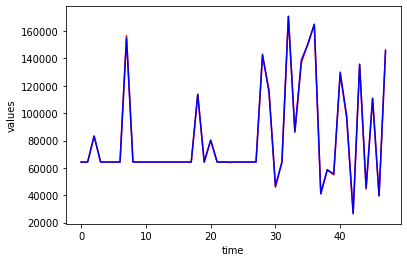

1) Mean absolute error 363.72197916666624
2) Mean squared error 425192.06129334524
3) Root mean squared error 652.0675281697021
4) mean squared log error 7.029770656280446e-05
5) root mean squared log error 0.008384372759056248
6) R2 score 0.9996739609713008

--- 1.1886920928955078 seconds ---


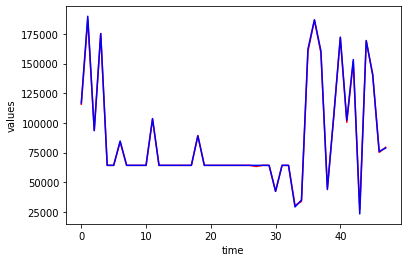

1) Mean absolute error 518.1743055555548
2) Mean squared error 922161.5083282391
3) Root mean squared error 960.2924077218559
4) mean squared log error 0.0005855921894046529
5) root mean squared log error 0.024199012157620256
6) R2 score 0.9995057512550717

--- 1.1841237545013428 seconds ---


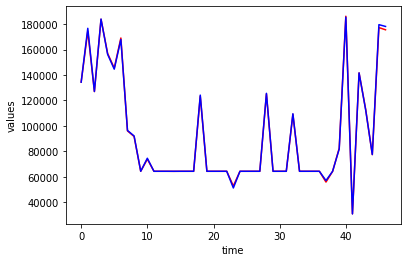

1) Mean absolute error 392.85836879432594
2) Mean squared error 577492.7851826239
3) Root mean squared error 759.9294606623854
4) mean squared log error 4.990344111738066e-05
5) root mean squared log error 0.007064236768213581
6) R2 score 0.999685313990134

--- 1.2728357315063477 seconds ---


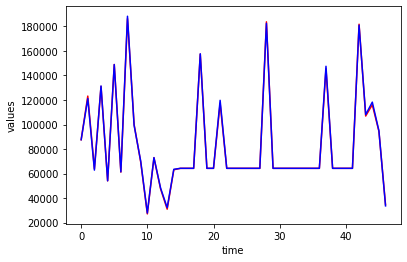

1) Mean absolute error 465.46968085106346
2) Mean squared error 684373.1283069148
3) Root mean squared error 827.268474140599
4) mean squared log error 0.00011239409899037435
5) root mean squared log error 0.010601608320928215
6) R2 score 0.9995526402121107

--- 1.1362438201904297 seconds ---


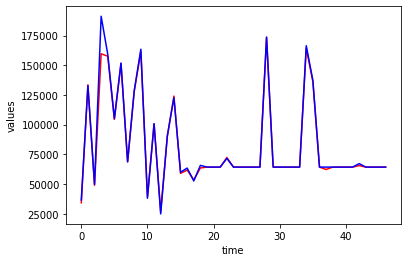

1) Mean absolute error 1266.9728368794335
2) Mean squared error 22232668.50855815
3) Root mean squared error 4715.1530737143785
4) mean squared log error 0.0010525478592953673
5) root mean squared log error 0.032442993994009975
6) R2 score 0.9857609322834117



In [ ]:
run_rfr(0,act_df)
run_rfr(1,act_df)
run_rfr(2,act_df)
run_rfr(3,act_df)
run_rfr(4,act_df)

In [ ]:
def run_xgb(fold,act_df):

  df_train = act_df[act_df.kfold != fold].reset_index(drop=True)

  df_valid = act_df[act_df.kfold == fold].reset_index(drop=True)

  x_train = df_train.drop("tcp.window_size",axis = 1)

  x_train_act = df_train["tcp.window_size"].values

  x_valid = df_valid.drop("tcp.window_size",axis = 1)

  x_valid_act = df_valid["tcp.window_size"].values

  # 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.5}

  model = xgb.XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.7,
    max_depth=10,
    min_child_weight=3,
    learning_rate=0.1,
    subsample=0.5
    
  )
  
  start_time = time.time()
  model.fit(x_train.values,x_train_act)
  predictions = model.predict(x_valid.values)
  print("--- %s seconds ---" % (time.time() - start_time))

  plt.plot(predictions,c="r")
  plt.xlabel("time")
  plt.ylabel("values")
  plt.plot(x_valid_act,c="b")
  plt.show()
  # for (x,y) in zip(x_valid_act,predictions):
  #   print(f"{x} {y}")
  mae = metrics.mean_absolute_error(x_valid_act,predictions)
  mse = metrics.mean_squared_error(x_valid_act,predictions)
  rmse = math.sqrt(mse)
  msle = metrics.mean_squared_log_error(x_valid_act,predictions)
  rmsle = math.sqrt(msle)
  r2 = metrics.r2_score(x_valid_act,predictions)

  print("1) Mean absolute error "+ str(mae))
  print("2) Mean squared error " + str(mse))
  print("3) Root mean squared error " + str(rmse))
  print("4) mean squared log error " + str(msle))
  print("5) root mean squared log error " + str(rmsle))
  print("6) R2 score " + str(r2) + "\n")





[09:30:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 0.13419032096862793 seconds ---


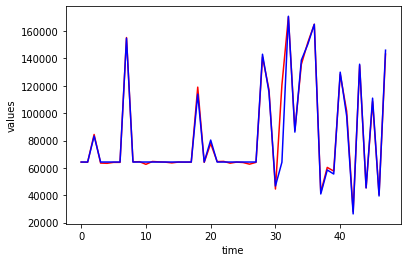

1) Mean absolute error 2238.226521809896
2) Mean squared error 68993172.16090083
3) Root mean squared error 8306.212865132993
4) mean squared log error 0.008727235659363172
5) root mean squared log error 0.093419674905039
6) R2 score 0.9470957506361002

[09:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 0.1274709701538086 seconds ---


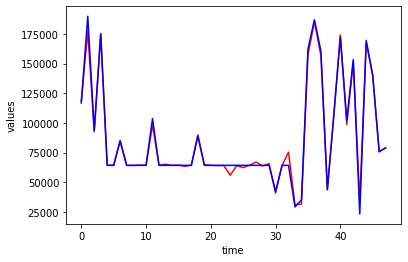

1) Mean absolute error 1904.5595296223958
2) Mean squared error 12560982.288950682
3) Root mean squared error 3544.1476110555386
4) mean squared log error 0.004635953659047648
5) root mean squared log error 0.06808783782033065
6) R2 score 0.9932677197266279

[09:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 0.1283409595489502 seconds ---


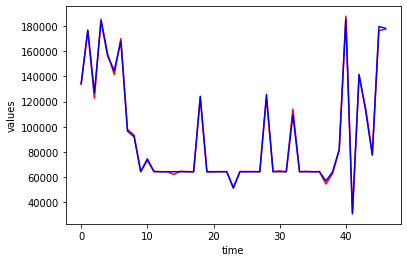

1) Mean absolute error 997.1592004654256
2) Mean squared error 2329063.8622943796
3) Root mean squared error 1526.1270793398496
4) mean squared log error 0.00022498027218328362
5) root mean squared log error 0.014999342391694499
6) R2 score 0.9987308519996202

[09:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 0.137556791305542 seconds ---


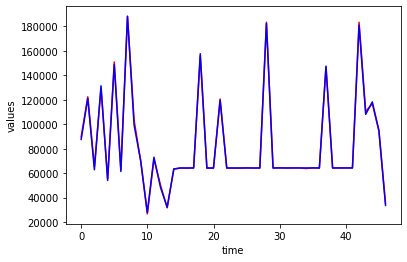

1) Mean absolute error 792.3434175531914
2) Mean squared error 1455186.5325226479
3) Root mean squared error 1206.3111259217699
4) mean squared log error 0.00026367705059833566
5) root mean squared log error 0.016238135687274436
6) R2 score 0.9990487763011103

[09:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 0.14387798309326172 seconds ---


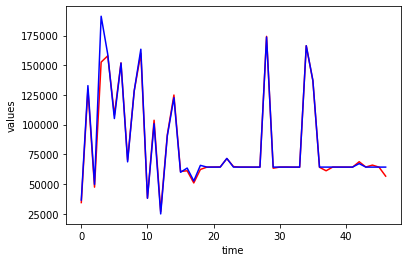

1) Mean absolute error 1886.7463015292553
2) Mean squared error 35066234.820496984
3) Root mean squared error 5921.675001255724
4) mean squared log error 0.001940132791386638
5) root mean squared log error 0.04404693850186001
6) R2 score 0.9775415851685711



In [ ]:
run_xgb(0,act_df)
run_xgb(1,act_df)
run_xgb(2,act_df)
run_xgb(3,act_df)
run_xgb(4,act_df)

In [ ]:

def run_dtr(fold,act_df):

  df_train = act_df[act_df.kfold != fold].reset_index(drop=True)

  df_valid = act_df[act_df.kfold == fold].reset_index(drop=True)

  x_train = df_train.drop("tcp.window_size",axis = 1)

  x_train_act = df_train["tcp.window_size"].values

  x_valid = df_valid.drop("tcp.window_size",axis = 1)

  x_valid_act = df_valid["tcp.window_size"].values

  # {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_leaf_nodes': 5, 'max_depth': 8, 'criterion': 'mse'}

  model = DecisionTreeRegressor(
      min_samples_split=20,
      min_samples_leaf=20,
      max_leaf_nodes=5,
      max_depth=8
  )
  
  start_time = time.time()
  model.fit(x_train.values,x_train_act)
  predictions = model.predict(x_valid.values)
  print("--- %s seconds ---" % (time.time() - start_time))

  plt.plot(predictions,c="r")
  plt.xlabel("time")
  plt.ylabel("values")
  plt.plot(x_valid_act,c="b")
  plt.show()
  # for (x,y) in zip(x_valid_act,predictions):
  #   print(f"{x} {y}")
  mae = metrics.mean_absolute_error(x_valid_act,predictions)
  mse = metrics.mean_squared_error(x_valid_act,predictions)
  rmse = math.sqrt(mse)
  msle = metrics.mean_squared_log_error(x_valid_act,predictions)
  rmsle = math.sqrt(msle)
  r2 = metrics.r2_score(x_valid_act,predictions)

  print("1) Mean absolute error "+ str(mae))
  print("2) Mean squared error " + str(mse))
  print("3) Root mean squared error " + str(rmse))
  print("4) mean squared log error " + str(msle))
  print("5) root mean squared log error " + str(rmsle))
  print("6) R2 score " + str(r2) + "\n")





--- 0.0033152103424072266 seconds ---


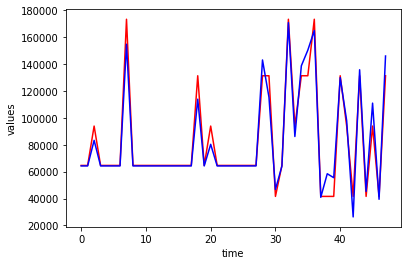

1) Mean absolute error 5031.982142857144
2) Mean squared error 66658880.31807255
3) Root mean squared error 8164.488980828656
4) mean squared log error 0.012570401924618344
5) root mean squared log error 0.11211780378074815
6) R2 score 0.9488856952621147

--- 0.0021157264709472656 seconds ---


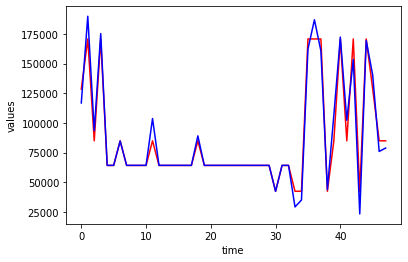

1) Mean absolute error 4813.221204620461
2) Mean squared error 69239558.26826103
3) Root mean squared error 8321.031082039113
4) mean squared log error 0.015470717151011499
5) root mean squared log error 0.12438133763154141
6) R2 score 0.9628898360380256

--- 0.0022330284118652344 seconds ---


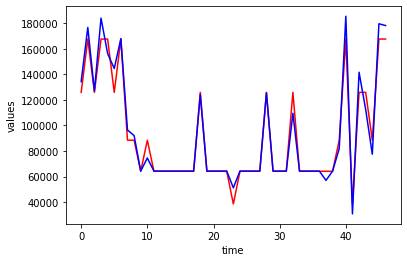

1) Mean absolute error 4846.112163789643
2) Mean squared error 61332676.90405006
3) Root mean squared error 7831.5181736397735
4) mean squared log error 0.0066509712438088476
5) root mean squared log error 0.08155348701195338
6) R2 score 0.9665787419954921

--- 0.010395288467407227 seconds ---


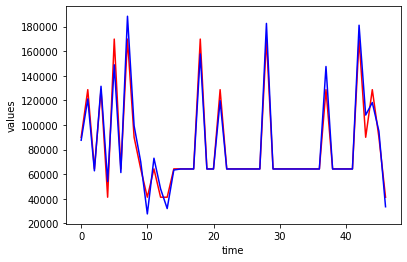

1) Mean absolute error 4914.668786689451
2) Mean squared error 62171751.89280644
3) Root mean squared error 7884.906587449622
4) mean squared log error 0.010875372075794566
5) root mean squared log error 0.10428505202470087
6) R2 score 0.9593596817451254

--- 0.0025353431701660156 seconds ---


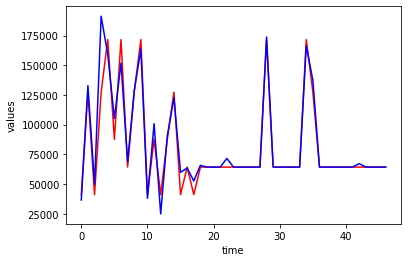

1) Mean absolute error 5240.758710060149
2) Mean squared error 134279709.01831406
3) Root mean squared error 11587.912194106153
4) mean squared log error 0.016673347153979112
5) root mean squared log error 0.12912531569750027
6) R2 score 0.9139996231698616



In [ ]:
run_dtr(0,act_df)
run_dtr(1,act_df)
run_dtr(2,act_df)
run_dtr(3,act_df)
run_dtr(4,act_df)